In [18]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

colors =['r','b','g','c','m']


In [29]:
header_list = ["Classe", "X", "Y"]
data_train=pd.read_csv('data_tp1_app.txt', sep = ' ' ,names=header_list)
data_test=pd.read_csv('data_tp1_dec.txt', sep = ' ' ,names=header_list)
data_train2=pd.read_csv('data_tp2_app.txt', sep = ' ' ,names=header_list)
data_test2=pd.read_csv('data_tp2_dec.txt', sep = ' ' ,names=header_list)
data_train3=pd.read_csv('data_tp3_app.txt', sep = ' ' ,names=header_list)
data_test3=pd.read_csv('data_tp3_dec.txt', sep = ' ' ,names=header_list)

### 1-Centers

In [30]:
def center(X,Y):
    return np.mean(X),np.mean(Y)


In [36]:
def apply_centers(train):
    centres=[]
    l=train.shape[0]
    j=0
    for i in range(int(l/5),int((l/5))*6,int(l/5)):
        centres.append(center(train.X[j:i],train.Y[j:i]))
        j+=int(l/5)
    return centres

In [42]:
def affiche_centers(train):
    centres=apply_centers(train)
    plt.scatter(train.X,train.Y)
    plt.title("training data ")
    plt.xlabel("X")
    plt.ylabel("Y") 
    for j in range(5):
        plt.scatter(centres[j][0],centres[j][1],color =colors[j] )
    plt.show()

    

### Afficher les center des données

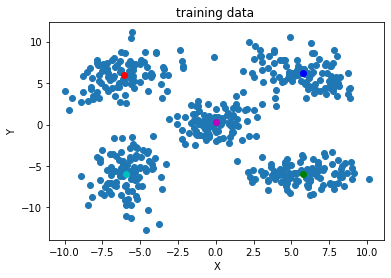

In [43]:
###TP1_train
affiche_centers(data_train)

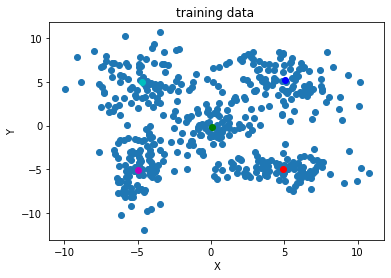

In [44]:
###TP2_train
affiche_centers(data_train2)

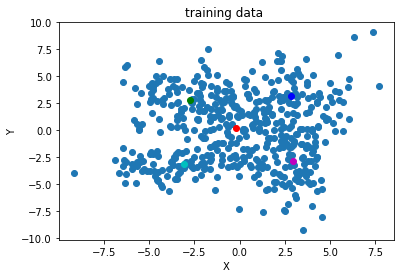

In [45]:
###TP3_train
affiche_centers(data_train3)

### 2-Distance

On va calculer la distance entre chaque echantillon de test est les centres de chaque classe 

In [48]:
def distance(test,classes,centres):
    A=test.shape[0]
    Distance = np.zeros((A,classes))
    for j in range(A):
        for k in range(classes):
            Distance[j,k] = np.linalg.norm(test.iloc[j,[1,2]] - centres[k] )
    return Distance
    
    

In [49]:
centres=apply_centers(data_train)
Distance=distance(data_test,5,centres)

In [51]:
def get_closest_classes(Distance):
    ligne=Distance.shape[0]
    "indice des deux les plus proches"
    indice_deux_proches= np.zeros((ligne,2))
    for k in range(ligne):
        indice_deux_proches[k]= pd.Series(Distance[k,:]).nsmallest(2).index
    return indice_deux_proches

In [54]:
indice_deux_proches=get_closest_classes(Distance)


In [56]:
def confusion_matrix(actual, predicted):
    Lenghtt = len(actual)
    top1=0
    top2=0
    # extraire les differents classes
    classes = np.unique(actual)

    matrix = np.zeros((len(classes), len(classes)))

    for i in range(len(classes)):
        for j in range(len(classes)):
            matrix[i, j] = np.sum((actual == classes[i]) & (predicted[:,0] == classes[j]))
    for k in range(Lenghtt):
        if actual[k] == predicted[k,0]:
            top1+=1
            top2+=1
        elif actual[k] == predicted[k,1]:
            top2+=1
            
    

    return matrix,top1/Lenghtt,top2/Lenghtt



In [58]:
def fct_Test(train,test,classes):
    centres=apply_centers(train)
    Distance=distance(test,classes,centres)
    indice_deux_proches=get_closest_classes(Distance)
    Matrix,top1,top2=confusion_matrix(test.Classe,indice_deux_proches+1)
    return Matrix,top1,top2



### 3-Test de performance

On commence Par les données de TP1

In [59]:
classes=5
Matrix,top1,top2=fct_Test(data_train,data_test,classes)

In [60]:
Matrix,top1,top2

(array([[ 98.,   0.,   0.,   0.,   2.],
        [  0., 100.,   0.,   0.,   0.],
        [  0.,   0.,  99.,   1.,   0.],
        [  0.,   0.,   0., 100.,   0.],
        [  1.,   0.,   0.,   0.,  99.]]),
 0.992,
 1.0)

Les données de TP2

In [61]:
Matrix,top1,top2=fct_Test(data_train2,data_test2,classes)

In [62]:
Matrix,top1,top2

(array([[100.,   0.,   0.,   0.,   0.],
        [  2.,  97.,   1.,   0.,   0.],
        [  0.,   5.,  84.,   1.,  10.],
        [  0.,   0.,   6.,  94.,   0.],
        [  0.,   0.,   2.,   0.,  98.]]),
 0.946,
 0.996)

Les données de TP3

In [63]:
Matrix,top1,top2=fct_Test(data_train3,data_test3,classes)

In [64]:
Matrix,top1,top2

(array([[43., 17., 16., 12., 12.],
        [12., 83.,  3.,  0.,  2.],
        [16.,  4., 78.,  2.,  0.],
        [16.,  0.,  7., 74.,  3.],
        [ 5.,  9.,  0.,  0., 86.]]),
 0.728,
 0.892)

### Conclusion

En utilisant ce classifieur gaussien , on prend compte que la distance directe entre chaque point de test , et le centre de chaque classe des points d'apprentissage

Ce classifieur est performant comme le montre les performances ci dessus , mais il perd de sens lorsqu'on est en grand dimension